<a href="https://colab.research.google.com/github/gustavoramos82/maratona-tech-rs/blob/main/Notebooks/An%C3%A1lise_explorat%C5%95oia_do_potencial_de_dano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
url = 'https://raw.githubusercontent.com/gustavoramos82/maratona-tech-rs/main/Datasets%20Utilizados/fiscali-barragem-dado-ele.csv'
barragem_rs = pd.read_csv(url,encoding='latin1')
barragem_rs.drop('Unnamed: 0',axis=1,inplace=True)
barragem_rs.head()

,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,DscTipoFundacao,DscTipoConstrucaoBarragem,DscCategoriaRiscoGeral,DscDanoPotencialGeral,...,DscFonteCombustivel,DscTipoOutorga,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DscSubBacia,DscMuninicpios
0,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,BAIXO,ALTO,...,Potencial hidrÃ¡ulico,ConcessÃ£o,"100000,00",100000,"45200,00",NÃ£o,-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
1,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,BAIXO,ALTO,...,Potencial hidrÃ¡ulico,ConcessÃ£o,"100000,00",100000,"45200,00",NÃ£o,-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
2,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,Castro Alves,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,BAIXO,ALTO,...,Potencial hidrÃ¡ulico,ConcessÃ£o,"100000,00",100000,"45200,00",NÃ£o,-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
3,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,Monte Claro,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,BAIXO,ALTO,...,Potencial hidrÃ¡ulico,ConcessÃ£o,"100000,00",100000,"45200,00",NÃ£o,-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
4,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,BAIXO,ALTO,...,Potencial hidrÃ¡ulico,ConcessÃ£o,"100000,00",100000,"45200,00",NÃ£o,-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"


In [3]:
barragem_rs.iloc[:,0:20].head()

,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,DscTipoFundacao,DscTipoConstrucaoBarragem,DscCategoriaRiscoGeral,DscDanoPotencialGeral,DscTipoFundacao.1,DscTipoConstrucaoBarragem.1,DscEstimativaVazaoProjeto,DscCasaForca,DscIdadeBarragem,DscTipoEstrutural,MdaComprimento,MdaAlturaMacicoFundacao,MdaAlturaMacicoTerreno,IdcClassificacaoBarragens
0,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,BAIXO,ALTO,Rocha SÃÂÃÂ£,Alvenaria de Pedra,(Cheia MÃÂÃÂ¡xima ProvÃÂÃÂ¡vel) ou Decam...,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem InformaÃÂÃÂ§ÃÂÃÂ£o,395.0,42.0,NaN,B
1,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,BAIXO,ALTO,Rocha SÃÂÃÂ£,Alvenaria de Pedra,(Cheia MÃÂÃÂ¡xima ProvÃÂÃÂ¡vel) ou Decam...,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem InformaÃÂÃÂ§ÃÂÃÂ£o,395.0,42.0,NaN,B
2,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,Castro Alves,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,BAIXO,ALTO,Rocha SÃÂÃÂ£,Alvenaria de Pedra,(Cheia MÃÂÃÂ¡xima ProvÃÂÃÂ¡vel) ou Decam...,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem InformaÃÂÃÂ§ÃÂÃÂ£o,340.0,50.0,NaN,B
3,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,Monte Claro,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,BAIXO,ALTO,Rocha SÃÂÃÂ£,Alvenaria de Pedra,(Cheia MÃÂÃÂ¡xima ProvÃÂÃÂ¡vel) ou Decam...,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 10 e 30 anos,Sem InformaÃÂÃÂ§ÃÂÃÂ£o,232.0,27.0,NaN,B
4,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,BAIXO,ALTO,Rocha SÃÂÃÂ£,Alvenaria de Pedra,(Cheia MÃÂÃÂ¡xima ProvÃÂÃÂ¡vel) ou Decam...,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 10 e 30 anos,Sem InformaÃÂÃÂ§ÃÂÃÂ£o,395.0,42.0,NaN,B


In [4]:
barragem_rs['DscCategoriaRiscoGeral'] = barragem_rs['DscCategoriaRiscoGeral'].str.capitalize()
barragem_rs['DscDanoPotencialGeral'] = barragem_rs['DscDanoPotencialGeral'].str.capitalize()

barragem_rs.iloc[:,0:20].head()

,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,DscTipoFundacao,DscTipoConstrucaoBarragem,DscCategoriaRiscoGeral,DscDanoPotencialGeral,DscTipoFundacao.1,DscTipoConstrucaoBarragem.1,DscEstimativaVazaoProjeto,DscCasaForca,DscIdadeBarragem,DscTipoEstrutural,MdaComprimento,MdaAlturaMacicoFundacao,MdaAlturaMacicoTerreno,IdcClassificacaoBarragens
0,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,Rocha SÃÂÃÂ£,Alvenaria de Pedra,(Cheia MÃÂÃÂ¡xima ProvÃÂÃÂ¡vel) ou Decam...,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem InformaÃÂÃÂ§ÃÂÃÂ£o,395.0,42.0,NaN,B
1,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,Rocha SÃÂÃÂ£,Alvenaria de Pedra,(Cheia MÃÂÃÂ¡xima ProvÃÂÃÂ¡vel) ou Decam...,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem InformaÃÂÃÂ§ÃÂÃÂ£o,395.0,42.0,NaN,B
2,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,Castro Alves,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,Rocha SÃÂÃÂ£,Alvenaria de Pedra,(Cheia MÃÂÃÂ¡xima ProvÃÂÃÂ¡vel) ou Decam...,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem InformaÃÂÃÂ§ÃÂÃÂ£o,340.0,50.0,NaN,B
3,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,Monte Claro,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,Rocha SÃÂÃÂ£,Alvenaria de Pedra,(Cheia MÃÂÃÂ¡xima ProvÃÂÃÂ¡vel) ou Decam...,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 10 e 30 anos,Sem InformaÃÂÃÂ§ÃÂÃÂ£o,232.0,27.0,NaN,B
4,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,Rocha SÃÂÃÂ£,Alvenaria de Pedra,(Cheia MÃÂÃÂ¡xima ProvÃÂÃÂ¡vel) ou Decam...,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 10 e 30 anos,Sem InformaÃÂÃÂ§ÃÂÃÂ£o,395.0,42.0,NaN,B


In [5]:
barragem_rs.drop('DscTipoConstrucaoBarragem.1',axis=1,inplace=True)
barragem_rs['DscEstimativaVazaoProjeto'] = barragem_rs['DscEstimativaVazaoProjeto'].str.replace('MÃÂÃÂ¡xima ProvÃÂÃÂ¡vel',
                                                                                                'Máxima Provavel')
barragem_rs.iloc[:,0:20].head()

,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,DscTipoFundacao,DscTipoConstrucaoBarragem,DscCategoriaRiscoGeral,DscDanoPotencialGeral,DscTipoFundacao.1,DscEstimativaVazaoProjeto,DscCasaForca,DscIdadeBarragem,DscTipoEstrutural,MdaComprimento,MdaAlturaMacicoFundacao,MdaAlturaMacicoTerreno,IdcClassificacaoBarragens,SigUFPrincipal
0,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,Rocha SÃÂÃÂ£,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem InformaÃÂÃÂ§ÃÂÃÂ£o,395.0,42.0,NaN,B,RS
1,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,Rocha SÃÂÃÂ£,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem InformaÃÂÃÂ§ÃÂÃÂ£o,395.0,42.0,NaN,B,RS
2,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,Castro Alves,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,Rocha SÃÂÃÂ£,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem InformaÃÂÃÂ§ÃÂÃÂ£o,340.0,50.0,NaN,B,RS
3,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,Monte Claro,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,Rocha SÃÂÃÂ£,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 10 e 30 anos,Sem InformaÃÂÃÂ§ÃÂÃÂ£o,232.0,27.0,NaN,B,RS
4,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,Rocha SÃÂÃÂ£,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 10 e 30 anos,Sem InformaÃÂÃÂ§ÃÂÃÂ£o,395.0,42.0,NaN,B,RS


In [6]:
barragem_rs.drop(['DscTipoFundacao.1','SigUFPrincipal'],axis=1,inplace=True)
barragem_rs['DscTipoEstrutural'] = barragem_rs['DscTipoEstrutural'].str.replace('InformaÃÂÃÂ§ÃÂÃÂ£o',
                                                                                'Informação')
barragem_rs.iloc[:,0:20].head()

,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,DscTipoFundacao,DscTipoConstrucaoBarragem,DscCategoriaRiscoGeral,DscDanoPotencialGeral,DscEstimativaVazaoProjeto,DscCasaForca,DscIdadeBarragem,DscTipoEstrutural,MdaComprimento,MdaAlturaMacicoFundacao,MdaAlturaMacicoTerreno,IdcClassificacaoBarragens,SigTipoGeracao,DscFaseUsina
0,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem Informação,395.0,42.0,NaN,B,UHE,OperaÃ§Ã£o
1,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem Informação,395.0,42.0,NaN,B,UHE,OperaÃ§Ã£o
2,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,Castro Alves,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem Informação,340.0,50.0,NaN,B,UHE,OperaÃ§Ã£o
3,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,Monte Claro,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 10 e 30 anos,Sem Informação,232.0,27.0,NaN,B,UHE,OperaÃ§Ã£o
4,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 10 e 30 anos,Sem Informação,395.0,42.0,NaN,B,UHE,OperaÃ§Ã£o


In [7]:
barragem_rs.drop(['DscFaseUsina'],axis=1,inplace=True)
barragem_rs.iloc[:,0:20].head()

,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,DscTipoFundacao,DscTipoConstrucaoBarragem,DscCategoriaRiscoGeral,DscDanoPotencialGeral,DscEstimativaVazaoProjeto,DscCasaForca,DscIdadeBarragem,DscTipoEstrutural,MdaComprimento,MdaAlturaMacicoFundacao,MdaAlturaMacicoTerreno,IdcClassificacaoBarragens,SigTipoGeracao,DscOrigemCombustivel
0,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem Informação,395.0,42.0,NaN,B,UHE,HÃ­drica
1,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem Informação,395.0,42.0,NaN,B,UHE,HÃ­drica
2,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,Castro Alves,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem Informação,340.0,50.0,NaN,B,UHE,HÃ­drica
3,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,Monte Claro,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 10 e 30 anos,Sem Informação,232.0,27.0,NaN,B,UHE,HÃ­drica
4,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 10 e 30 anos,Sem Informação,395.0,42.0,NaN,B,UHE,HÃ­drica


In [8]:
barragem_rs.drop(['DscOrigemCombustivel'],axis=1,inplace=True)
barragem_rs.iloc[:,0:20].head()

,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,DscTipoFundacao,DscTipoConstrucaoBarragem,DscCategoriaRiscoGeral,DscDanoPotencialGeral,DscEstimativaVazaoProjeto,DscCasaForca,DscIdadeBarragem,DscTipoEstrutural,MdaComprimento,MdaAlturaMacicoFundacao,MdaAlturaMacicoTerreno,IdcClassificacaoBarragens,SigTipoGeracao,DscFonteCombustivel
0,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem Informação,395.0,42.0,NaN,B,UHE,Potencial hidrÃ¡ulico
1,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem Informação,395.0,42.0,NaN,B,UHE,Potencial hidrÃ¡ulico
2,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,Castro Alves,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem Informação,340.0,50.0,NaN,B,UHE,Potencial hidrÃ¡ulico
3,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,Monte Claro,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 10 e 30 anos,Sem Informação,232.0,27.0,NaN,B,UHE,Potencial hidrÃ¡ulico
4,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 10 e 30 anos,Sem Informação,395.0,42.0,NaN,B,UHE,Potencial hidrÃ¡ulico


In [9]:
barragem_rs.shape

(1224, 29)

In [10]:
barragem_rs.iloc[:,19:30].head()

,DscFonteCombustivel,DscTipoOutorga,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DscSubBacia,DscMuninicpios
0,Potencial hidrÃ¡ulico,ConcessÃ£o,"100000,00",100000,"45200,00",NÃ£o,-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
1,Potencial hidrÃ¡ulico,ConcessÃ£o,"100000,00",100000,"45200,00",NÃ£o,-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
2,Potencial hidrÃ¡ulico,ConcessÃ£o,"100000,00",100000,"45200,00",NÃ£o,-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
3,Potencial hidrÃ¡ulico,ConcessÃ£o,"100000,00",100000,"45200,00",NÃ£o,-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
4,Potencial hidrÃ¡ulico,ConcessÃ£o,"100000,00",100000,"45200,00",NÃ£o,-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"


In [11]:
barragem_rs.drop(['DscFonteCombustivel','IdcGeracaoQualificada'],axis=1,inplace=True)
barragem_rs.head()

,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,DscTipoFundacao,DscTipoConstrucaoBarragem,DscCategoriaRiscoGeral,DscDanoPotencialGeral,...,IdcClassificacaoBarragens,SigTipoGeracao,DscTipoOutorga,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DscSubBacia,DscMuninicpios
0,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,...,B,UHE,ConcessÃ£o,"100000,00",100000,"45200,00",-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
1,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,...,B,UHE,ConcessÃ£o,"100000,00",100000,"45200,00",-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
2,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,Castro Alves,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,...,B,UHE,ConcessÃ£o,"100000,00",100000,"45200,00",-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
3,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,Monte Claro,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,...,B,UHE,ConcessÃ£o,"100000,00",100000,"45200,00",-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
4,12,14 de Julho,COMPANHIA ENERGÃÂÃÂTICA RIO DAS ANTAS,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,...,B,UHE,ConcessÃ£o,"100000,00",100000,"45200,00",-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"


In [12]:
barragem_rs['NomEmpresa'] = barragem_rs['NomEmpresa'].str.replace('ENERGÃÂÃÂTICA','ENERGETICA')
barragem_rs['NomEmpresa'] = barragem_rs['NomEmpresa'].str.capitalize()

barragem_rs.head()

,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,DscTipoFundacao,DscTipoConstrucaoBarragem,DscCategoriaRiscoGeral,DscDanoPotencialGeral,...,IdcClassificacaoBarragens,SigTipoGeracao,DscTipoOutorga,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DscSubBacia,DscMuninicpios
0,12,14 de Julho,Companhia energetica rio das antas,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,...,B,UHE,ConcessÃ£o,"100000,00",100000,"45200,00",-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
1,12,14 de Julho,Companhia energetica rio das antas,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,...,B,UHE,ConcessÃ£o,"100000,00",100000,"45200,00",-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
2,12,14 de Julho,Companhia energetica rio das antas,Castro Alves,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,...,B,UHE,ConcessÃ£o,"100000,00",100000,"45200,00",-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
3,12,14 de Julho,Companhia energetica rio das antas,Monte Claro,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,...,B,UHE,ConcessÃ£o,"100000,00",100000,"45200,00",-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
4,12,14 de Julho,Companhia energetica rio das antas,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,...,B,UHE,ConcessÃ£o,"100000,00",100000,"45200,00",-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"


In [13]:
barragem_rs['MdaPotenciaOutorgadaKw'] = barragem_rs['MdaPotenciaOutorgadaKw'].str.replace(',','.')
barragem_rs['MdaPotenciaOutorgadaKw'] = barragem_rs['MdaPotenciaOutorgadaKw'].astype(float)

barragem_rs['MdaGarantiaFisicaKw'] = barragem_rs['MdaGarantiaFisicaKw'].str.replace(',','.')
barragem_rs['MdaGarantiaFisicaKw'] = barragem_rs['MdaGarantiaFisicaKw'].astype(float)

In [19]:
barragem_rs.drop('MdaPotenciaFiscalizadaKw',axis=1,inplace=True)

In [39]:
barragem_rs.iloc[:,0:20].head()

,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,DscTipoFundacao,DscTipoConstrucaoBarragem,DscCategoriaRiscoGeral,DscDanoPotencialGeral,DscEstimativaVazaoProjeto,DscCasaForca,DscIdadeBarragem,DscTipoEstrutural,MdaComprimento,MdaAlturaMacicoFundacao,MdaAlturaMacicoTerreno,IdcClassificacaoBarragens,SigTipoGeracao,DscTipoOutorga
0,12,14 de Julho,Companhia energetica rio das antas,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem Informação,395.0,42.0,NaN,B,UHE,ConcessÃ£o
1,12,14 de Julho,Companhia energetica rio das antas,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem Informação,395.0,42.0,NaN,B,UHE,ConcessÃ£o
2,12,14 de Julho,Companhia energetica rio das antas,Castro Alves,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 5 e 10 anos,Sem Informação,340.0,50.0,NaN,B,UHE,ConcessÃ£o
3,12,14 de Julho,Companhia energetica rio das antas,Monte Claro,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 10 e 30 anos,Sem Informação,232.0,27.0,NaN,B,UHE,ConcessÃ£o
4,12,14 de Julho,Companhia energetica rio das antas,14 de Julho,Barragem,Normal,Rocha SÃÂÃÂ£,Alvenaria de Pedra,Baixo,Alto,(Cheia Máxima Provavel) ou Decamilenar,Casa de forÃÂÃÂ§a associada ÃÂÃÂ barrag...,entre 10 e 30 anos,Sem Informação,395.0,42.0,NaN,B,UHE,ConcessÃ£o


In [40]:
barragem_rs.iloc[:,20:31].head()

,MdaPotenciaOutorgadaKw,MdaGarantiaFisicaKw,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DscSubBacia,DscMuninicpios
0,100000.0,45200.0,-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
1,100000.0,45200.0,-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
2,100000.0,45200.0,-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
3,100000.0,45200.0,-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"
4,100000.0,45200.0,-29.064753,-51.674942,86 - Taquari,"Bento GonÃ§alves - RS, CotiporÃ£ - RS"


Text(0, 0.5, 'Quantidade')

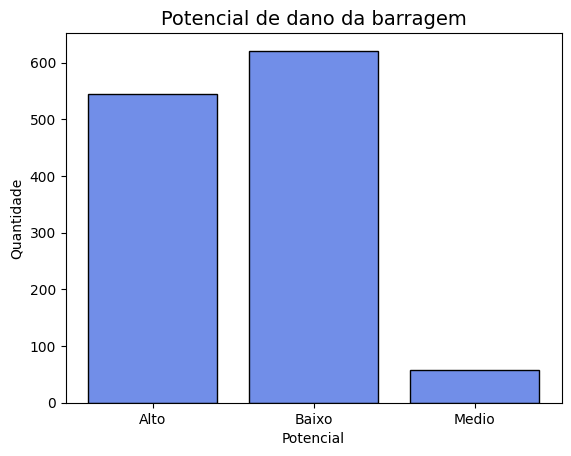

In [14]:
plt.title('Potencial de dano da barragem',fontsize=14)
sns.histplot(x='DscDanoPotencialGeral',data=barragem_rs,color='royalblue',
             shrink=.8)
plt.xlabel('Potencial')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

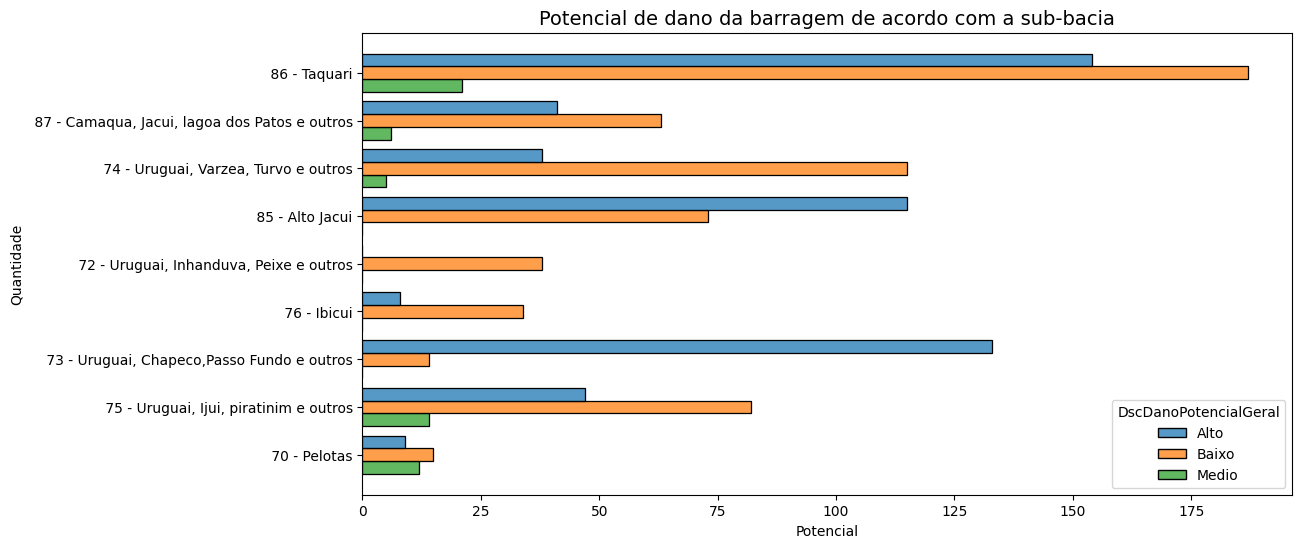

In [26]:
plt.figure(figsize=(12,6))
plt.title('Potencial de dano da barragem de acordo com a sub-bacia',fontsize=14)
sns.histplot(hue='DscDanoPotencialGeral',data=barragem_rs,color='royalblue',
             shrink=.8,y='DscSubBacia',multiple='dodge')
plt.xlabel('Potencial')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

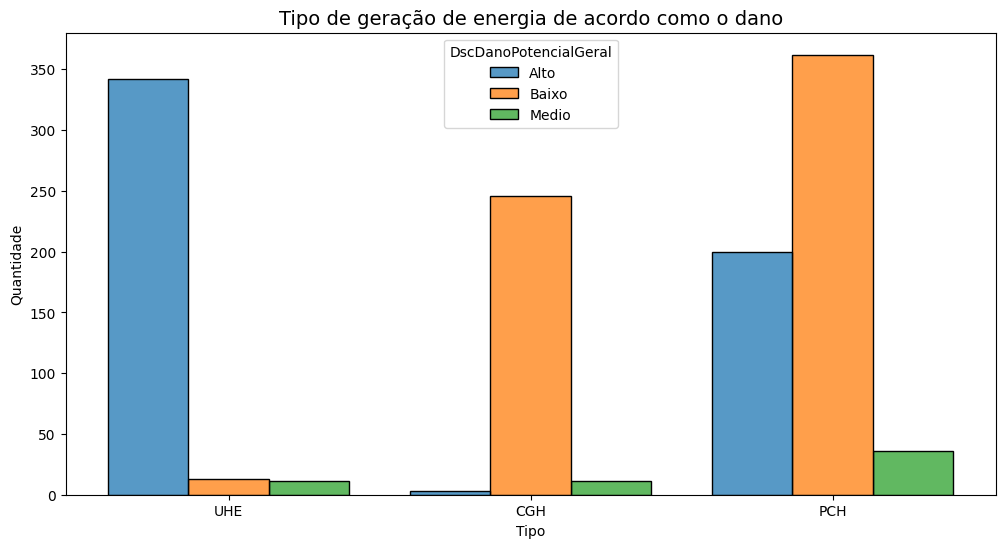

In [38]:
plt.figure(figsize=(12,6))
plt.title('Tipo de geração de energia de acordo como o dano',fontsize=14)
sns.histplot(hue='DscDanoPotencialGeral',data=barragem_rs,color='royalblue',
             shrink=.8,x='SigTipoGeracao',multiple='dodge')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Potencial de dano da barragem de acordo com a sub-bacia',fontsize=14)
sns.histplot(hue='DscDanoPotencialGeral',data=barragem_rs,color='royalblue',
             shrink=.8,y='DscIdadeBarragem',multiple='dodge')
plt.xlabel('Potencial')
plt.ylabel('Quantidade')

In [35]:
px.scatter(barragem_rs,x='MdaPotenciaOutorgadaKw',y='MdaGarantiaFisicaKw',color='DscDanoPotencialGeral',
          labels={'MdaPotenciaOutorgadaKw':'Potência total','MdaGarantiaFisicaKw':'Garantia Física',
                  'DscDanoPotencialGeral':'Potencial de dano'},
           title='Garantia física pela potência total outorgada de acordo com o dano')

In [36]:
px.scatter(barragem_rs,x='MdaComprimento',y='MdaAlturaMacicoFundacao',color='DscDanoPotencialGeral',
          labels={'MdaComprimento':'Comprimento do barramento','MdaAlturaMacicoFundacao':'Altura do maciço (fundação)',
                  'DscDanoPotencialGeral':'Potencial de dano'},
           title='Comprimento do barramento pela Altura do maciço a partir da fundação')

In [46]:
fig = px.scatter_mapbox(barragem_rs,lat='NumCoordNEmpreendimento',lon='NumCoordEEmpreendimento',color='DscDanoPotencialGeral',
                     hover_name='NomUsina', hover_data=['NomEmpresa','DscTipo','DscTipoConstrucaoBarragem'])
fig.update_layout(mapbox_style="open-street-map")
fig.show()

Text(0.5, 0, 'Quantidade')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 131 (\x83) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 131 (\x83) missing from current font.



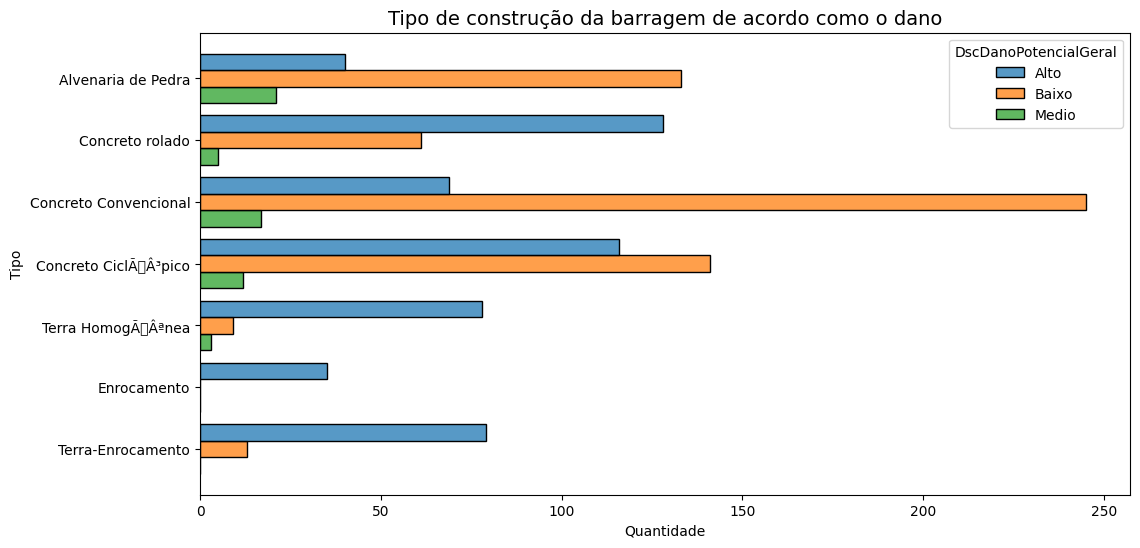

In [51]:
plt.figure(figsize=(12,6))
plt.title('Tipo de construção da barragem de acordo como o dano',fontsize=14)
sns.histplot(hue='DscDanoPotencialGeral',data=barragem_rs,color='royalblue',
             shrink=.8,y='DscTipoConstrucaoBarragem',multiple='dodge')
plt.ylabel('Tipo')
plt.xlabel('Quantidade')

In [52]:
barragem_rs.to_csv('Datframe-padrao-ouro.csv')